In [1]:
pip install cptec-subsaz

  Using cached cptec_subsaz-0.0.18-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install basemap

  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.6/657.6 kB 2.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 6.5 MB/s  0:00:04m0:00:0100:01
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Attempting uninstall: pyshp
    Found existing installation: pyshp 3.0.2.post1
    Uninstalling pyshp-3.0.2.post1:
      Successfully uninstalled pyshp-3.0.2.post1 0/3 [pyshp]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [basemap]m2/3 [basemap]data]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import subsaz.CPTEC_SUB as SUB
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap


# <span style="color:#336699; font-size:24px;font-weight: bold;">SubSazonal</span>
<hr style="border:2px solid #0077b9;">
<a  href="https://subsazonal.cptec.inpe.br/" title="Sub Page">🌐 Web page</a><br><br>
<a  href="https://subsazonal.readthedocs.io/en/latest" title="Sub Doc">📚 Documentation</a><br><br>

In [4]:
subsaz = SUB.model()



#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

--------------------
Forecast data available for reading.

2023-01-04 - 2023-01-11 - 2023-01-18 - 2023-01-25 - 2023-02-01
2023-02-08 - 2023-02-15 - 2023-02-22 - 2023-03-01 - 2023-03-08
2023-03-15 - 2023-03-22 - 2023-03-29 - 2023-04-05 - 2023-04-12
2023-04-19 - 2023-04-26 - 2023-05-03 - 2023-05-10 - 2023-05-17
2023-05-24 - 2023-05-31 - 2023-06-07 - 2023-06-14 - 2023-06-21
2023-06-28 - 2023-07-05 - 2023-07-12 - 2023-07-19 - 2023-07-26
2023-08-02 - 2023-08-09 - 2023-08-16 - 2023-08-23 - 2023-08-30
2023-09-06 - 2023-09-13 - 2023-09-20 - 2023-09-27 - 2023-10-04
2023-10-11 - 2023-10-18 - 2023-10-25 - 2023-11-01 - 2023-11-08
2023-11-15 - 2023-11-22 - 2023-11-29 - 2023-12-06 - 2023-12-13
2023-12-20 - 2023-12-27 - 2024-01-03 - 2024-01-10 - 2024-01-17
2024-01-24 - 2024-01-31 - 2024-02-07 - 2024-02-14 - 2024-02-21
2024-02-28 - 2024-03-06 - 2024-03-13 - 2024-03-20 - 2024-03-27
2024-04-03 - 2024-04-10 - 2024-04-17 - 2024-04-2

In [5]:
#Data Condição Inicial (IC)
date = '20240626'

#variavel
var = 'prec'

#produto semanal escolhido
# week - semanal
# fort - 14 dias
# 3wks - 21 dias
# mnth - mensal
product = 'week'

#qual campo deseja plotar?
#'anomalies' - anomalias do campo
#'prob_positve_anomaly' - probabilidade de anomalias positivas
#'prob_terciles' - probabilidades de tercis
#'totals' - total previsto para o período/produto escolhido
field = 'anomalies'

#passo depende do produto escolhido
# para produtos semanais, são produzidos 4 campos 01:04
# para produtos com 14 dias, 2 produtos (01 e 02)
# para 21 dias e mensal, apenas 01 disponível
step = '01'

#Requisição dos dados de acordo com as variáveis solicitadas anteriormente
f = subsaz.load(date=date, var=var, step=step, product=product ,field=field)
f

<xarray.Dataset> Size: 300kB
Dimensions:  (time: 1, lat: 192, lon: 384)
Coordinates:
  * lat      (lat) float64 2kB -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * time     (time) datetime64[ns] 8B 2024-06-26
  * lon      (lon) float64 3kB -180.0 -179.1 -178.1 -177.2 ... 177.2 178.1 179.1
Data variables:
    prec     (time, lat, lon) float32 295kB 3.187 3.192 3.197 ... -1.632 -1.648
Attributes:
    center:          National Institute for Space Research - INPE
    model:           The Brazilian Global Atmospheric Model V1.2 (TQ0126L042 ...
    initialization:  2024-06-26
    field:           Forecast Anomalies

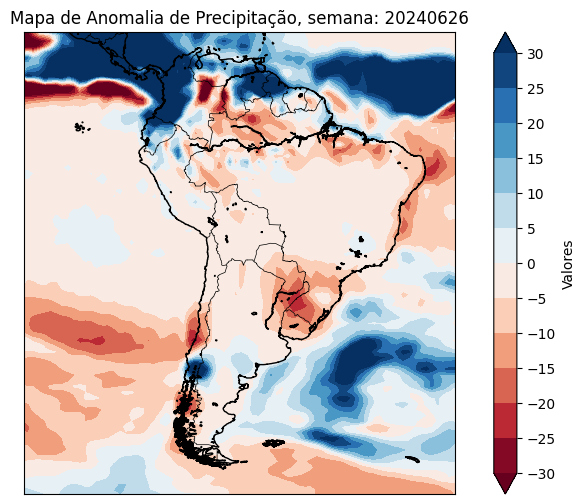

In [6]:
# Supondo que 'f' seja um Dataset xarray e 'prec' seja a variável de interesse
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar o mapa
mapa = Basemap(projection='cyl', resolution='i', ax=ax,
               llcrnrlat=-60, urcrnrlat=15, llcrnrlon=-100, urcrnrlon=-30)

# Desenhar linhas de continentes
mapa.drawcoastlines()

# Desenhar as fronteiras dos países (opcional)
mapa.drawcountries()

# Configurar a escala de cores
cmap = plt.get_cmap('RdBu')
levels = np.arange(-30, 35, 5)

# Extraindo os dados de 'f' e ajustando as dimensões para contourf
lon, lat = np.meshgrid(f.lon.values, f.lat.values)
prec = f.prec[0, :, :].values  # Seleciona a primeira camada se 'prec' tiver 3 dimensões

# Plotando com contourf para uma escala de cores discreta
mappable = mapa.contourf(lon, lat, prec, levels=levels, cmap=cmap, extend='both')

# Adicionar a barra de cores
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_ticks(levels)
cbar.set_label('Valores')

plt.title('Mapa de Anomalia de Precipitação, semana: '+date)
plt.show()


#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

--------------------
Forecast data available for reading.

2023-01-04 - 2023-01-11 - 2023-01-18 - 2023-01-25 - 2023-02-01
2023-02-08 - 2023-02-15 - 2023-02-22 - 2023-03-01 - 2023-03-08
2023-03-15 - 2023-03-22 - 2023-03-29 - 2023-04-05 - 2023-04-12
2023-04-19 - 2023-04-26 - 2023-05-03 - 2023-05-10 - 2023-05-17
2023-05-24 - 2023-05-31 - 2023-06-07 - 2023-06-14 - 2023-06-21
2023-06-28 - 2023-07-05 - 2023-07-12 - 2023-07-19 - 2023-07-26
2023-08-02 - 2023-08-09 - 2023-08-16 - 2023-08-23 - 2023-08-30
2023-09-06 - 2023-09-13 - 2023-09-20 - 2023-09-27 - 2023-10-04
2023-10-11 - 2023-10-18 - 2023-10-25 - 2023-11-01 - 2023-11-08
2023-11-15 - 2023-11-22 - 2023-11-29 - 2023-12-06 - 2023-12-13
2023-12-20 - 2023-12-27 - 2024-01-03 - 2024-01-10 - 2024-01-17
2024-01-24 - 2024-01-31 - 2024-02-07 - 2024-02-14 - 2024-02-21
2024-02-28 - 2024-03-06 - 2024-03-13 - 2024-03-20 - 2024-03-27
2024-04-03 - 2024-04-10 - 2024-04-17 - 2024-04-2

/Users/felipeomello/opt/anaconda3/envs/metview/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


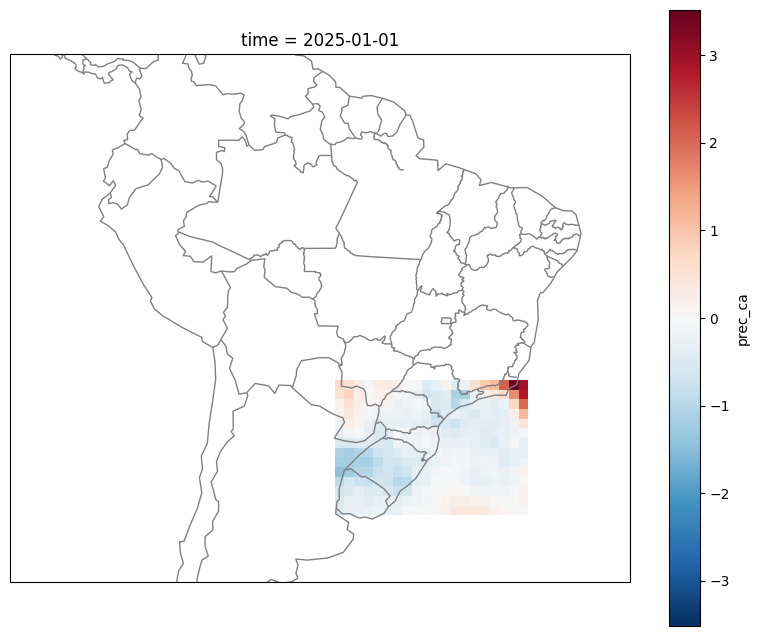

In [7]:
# Inicializa o construtor
subsaz = SUB.model()
# Filtrar area definida
subsaz.dict['area']['reduce'] = True
subsaz.dict['area']['minlat'] = -34.44
subsaz.dict['area']['maxlat'] = -21.43
subsaz.dict['area']['minlon'] = 301.14
subsaz.dict['area']['maxlon'] = 320.57

# Requisição dos dados
f = subsaz.load(date='20250101', var='prec_ca', product='mnth' ,field='anomalies')

# Definir tamanho da figura
fig = plt.figure(figsize=(10,8))

# Setar figura unica
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Colocar  Linhas de Borda dos paises e linhas costeiras
ax.add_feature(cfeature.COASTLINE,color='grey')
ax.add_feature(cfeature.BORDERS,color='grey')

# Definir Regiao do Brasil
ax.set_extent([-90,-30,10,-41], ccrs.PlateCarree())

# Setar estados do Brasil
states = cfeature.NaturalEarthFeature(category='cultural',
                                         name='admin_1_states_provinces_lines',
                                         scale='50m', facecolor='none')

# Colocar Estados Brasil
ax.add_feature(states, edgecolor='gray')

# Plotar variavel
f.prec_ca.sel(time="2025-01-01").plot()
plt.show()